In [54]:
import numpy as np
inf=float("inf")

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.stats as st

import stablerank.srank as sr
import stablerank.geometry_objects_2020 as ge

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import _pickle as pickle

from ripser import ripser
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from PIL import Image

#from keras.datasets import mnist
#from matplotlib import pyplot

### Import Data

In [281]:
df=pd.read_csv('challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv', sep=',')
#df=pd.read_csv('challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv', sep=',',header=None)

In [321]:
df=df.drop_duplicates(subset =[" pixels"])
df

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35881,0,PrivateTest,181 177 176 156 178 144 136 132 122 107 131 16...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...


In [289]:
#df[2][3].split(' ')
first_picture = [int(numeric_string) for numeric_string in df[" pixels"][0].split(' ')]

In [290]:
first_picture_arr = np.array(first_picture)

In [291]:
first_picture_arr

array([ 70,  80,  82, ..., 106, 109,  82])

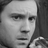

In [292]:
first_picture_arr.resize((48,48))
im = Image.fromarray((255-first_picture_arr* 255).astype(np.uint8))
im

### First Representation

In [322]:
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotion_categories = [0,1,2,3,4,5,6]
colours=["red","blue","yellow","orange","green","black","purple"]

# specifying the number of pictures for subsampling
number_of_pictures = 80

# specifying metric
metric = "euclidean"
#metric_parameter = 3

# specifying clustering method
clustering_method = "single"

plt.figure(figsize=(20,20))

for e in emotion_categories:
    pos = np.array(np.where(df["emotion"]==e))[0]
    #rand_pos = pos[np.random.randint(0,len(pos)-1,number_of_pictures)]
    rand_pos = pos[list(np.random.permutation(np.arange(0,len(pos)-1))[:number_of_pictures])]
    points_dummy = np.empty((len(rand_pos),48*48), int)

    for i in range(0,len(rand_pos)):
        points_dummy[i] = [int(numeric_string) for numeric_string in df[" pixels"][rand_pos[i]].split(' ')]

    points = np.vstack(points_dummy)
    
    point_cloud = sr.EucObject(points)
    
    f_pcf = point_cloud.get_h0sr(metric = metric, metric_parameter = metric_parameter)
    
    f_pcf.plot(color=colours[emotion_categories.index(e)])

    #print("size: ", point_cloud.size)
    #print("dimension: ", point_cloud.dim)
    #print("points: ", point_cloud.points)

KeyError: 14207

<Figure size 1440x1440 with 0 Axes>

In [337]:
#Schmierblatt

pos = np.array(np.where(df["emotion"]==3))[0]
rand_pos = pos[list(np.random.permutation(np.arange(0,len(pos)-1))[:20])]
points_dummy = np.empty((len(rand_pos),48*48), int)

for i in range(0,len(rand_pos)):
    points_dummy[i] = [int(numeric_string) for numeric_string in df[" pixels"][rand_pos[i]].split(' ')]

points = np.vstack(points_dummy)

In [339]:
angry = sr.EucObject(points)
print("size: ", angry.size)
print("dimension: ", angry.dim)
print("points: ", angry.points)

size:  20
dimension:  2304
points:  [[ 16.  14.  15. ... 136. 111. 129.]
 [254. 252. 254. ...  15.  22.  29.]
 [ 52.  61.  60. ...  49.  43.  43.]
 ...
 [ 88.  93.  94. ...  94.  92.  95.]
 [158. 189. 198. ... 173. 153. 135.]
 [ 78.  52.  45. ...  60.  28.  38.]]


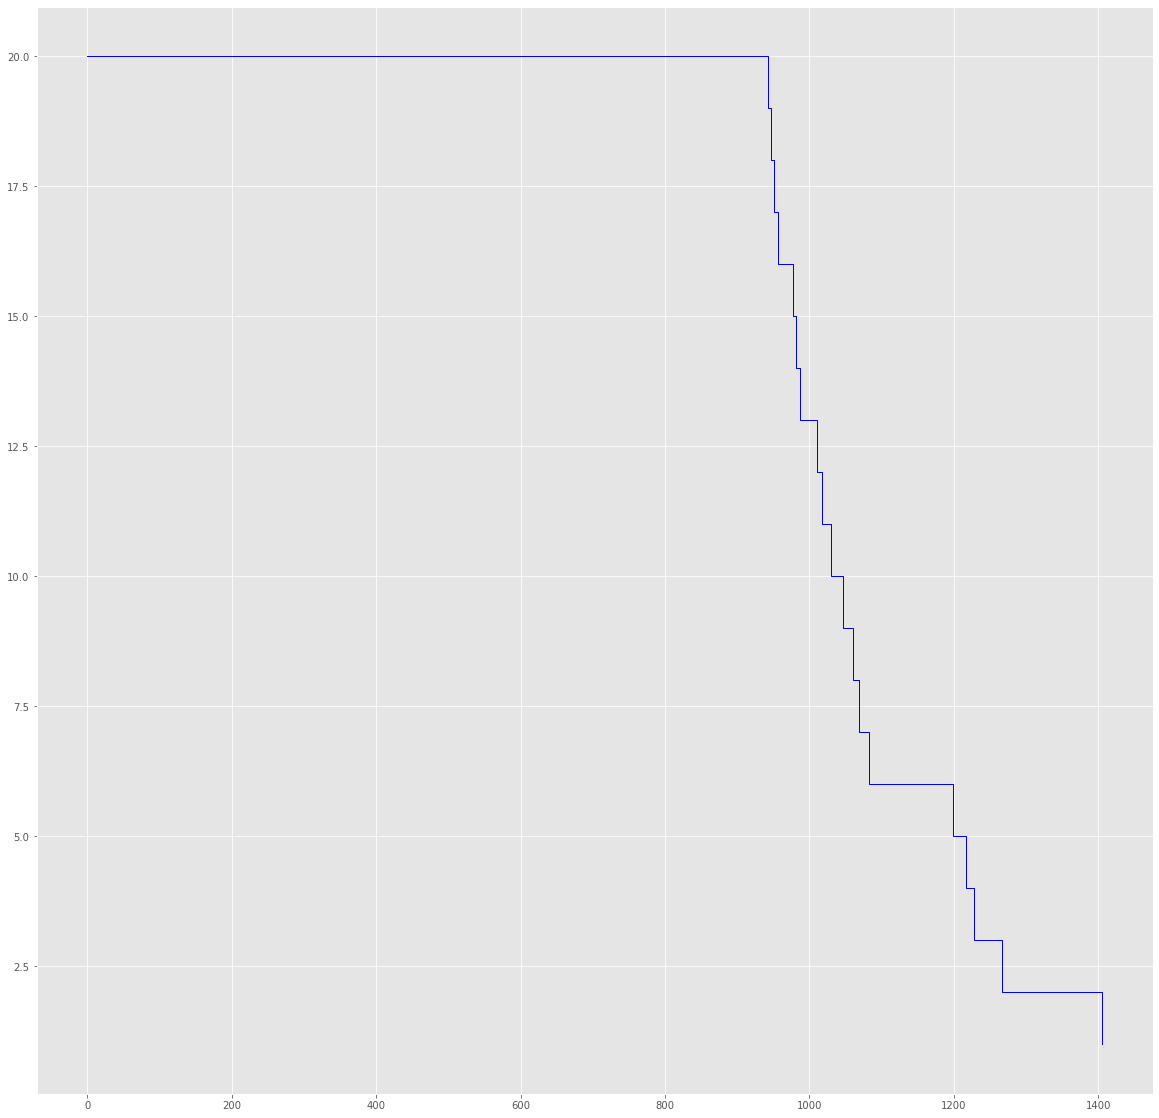

In [340]:
# specifying metric
metric = "minkowski"
metric_parameter = 3

# specifying clustering method
clustering_method = "complete"


f1 = angry.get_h0sr(metric = metric, metric_parameter = metric_parameter)


plt.figure(figsize=(20,20))

f1.plot(color ="blue")
